# Grafo: Unidades Nutricionais por rede de Fast Food 

GRAFO REDUZIDO PARA FACILITAR PROCESSOS - NÃO É O TRABALHO FINAL - SOMENTE AJUDA NA COMPREENSÃO

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Como fizemos a leitura e limpeza de dados no notebook "Dados_MYSQL", aqui só precisamos importa-los:

In [2]:
df = pd.read_csv("fastfood_REDUZIDO.csv", index_col="name")

Queremos criar nodes que representem cada nutriente, de forma que o tamanho deles seja determinado pela sua quantidade contida em todos os lanches. Para tornar isso possível, somamos essas quantidades e normalizamos os dados.

In [3]:
soma_list,nutri = [],[]

for nutriente in df.columns[0:len(df.columns)-2]: #para cada nutriente no dataframe (-2 para excluir "categoria" e "rede")
    soma_list.append(df[nutriente].sum()) #soma os valores totais 
    nutri.append(nutriente) #guardamos o nome do nutriente

soma_list = pd.Series(soma_list)
  
soma_norm = (soma_list - soma_list.mean())/ soma_list.std() #normalização dos dados totais
soma_min = abs(soma_norm.min())

soma_norm = round((soma_norm + soma_min + 1)*700) #deixa todos os valores > 0 
    
soma_nutri = dict(zip(nutri,soma_norm)) #criamos um dicionário com o nutriente e sua soma total normalizada

Agora precisamos simplismente criar o grafo, os nós e as arestas.

In [4]:
fastfood = nx.Graph()  #criar o grafo

#criar os nós para cada unidade nutricional  
for nutrientes in df.columns[0:len(df.columns)-2]:
    if soma_nutri[nutrientes] >0:
        fastfood.add_node(nutrientes,color="grey",size=soma_nutri[nutrientes])
    # soma_nutri possui os dados normalizads criados anteriormente
    
# criar os nós para cada lanche    
for lanche in df.index:
    fastfood.add_node(lanche, color= df.loc[lanche,"rede"],size=700,categoria=df.loc[lanche,"categoria"]) #criando os nós de cada lanche 
     # o atributo categoria será usado futuramente para filtrar o grafo
         
        
#criar uma aresta ligando os lanches e os nós
for lanche in df.index:
    for nutriente in df.columns[0:len(df.columns)-2]:
        local = (df.copy()).dropna() # não faz sentido criar uma aresta se não temos o valor
        if local.loc[lanche,nutriente] > 0: #tbm não faz se o valor for zero
            fastfood.add_edge(lanche, nutriente, weight = local.loc[lanche,nutriente])
            # atribuimos o peso como o peso do nutriente, que foi normalizado
            

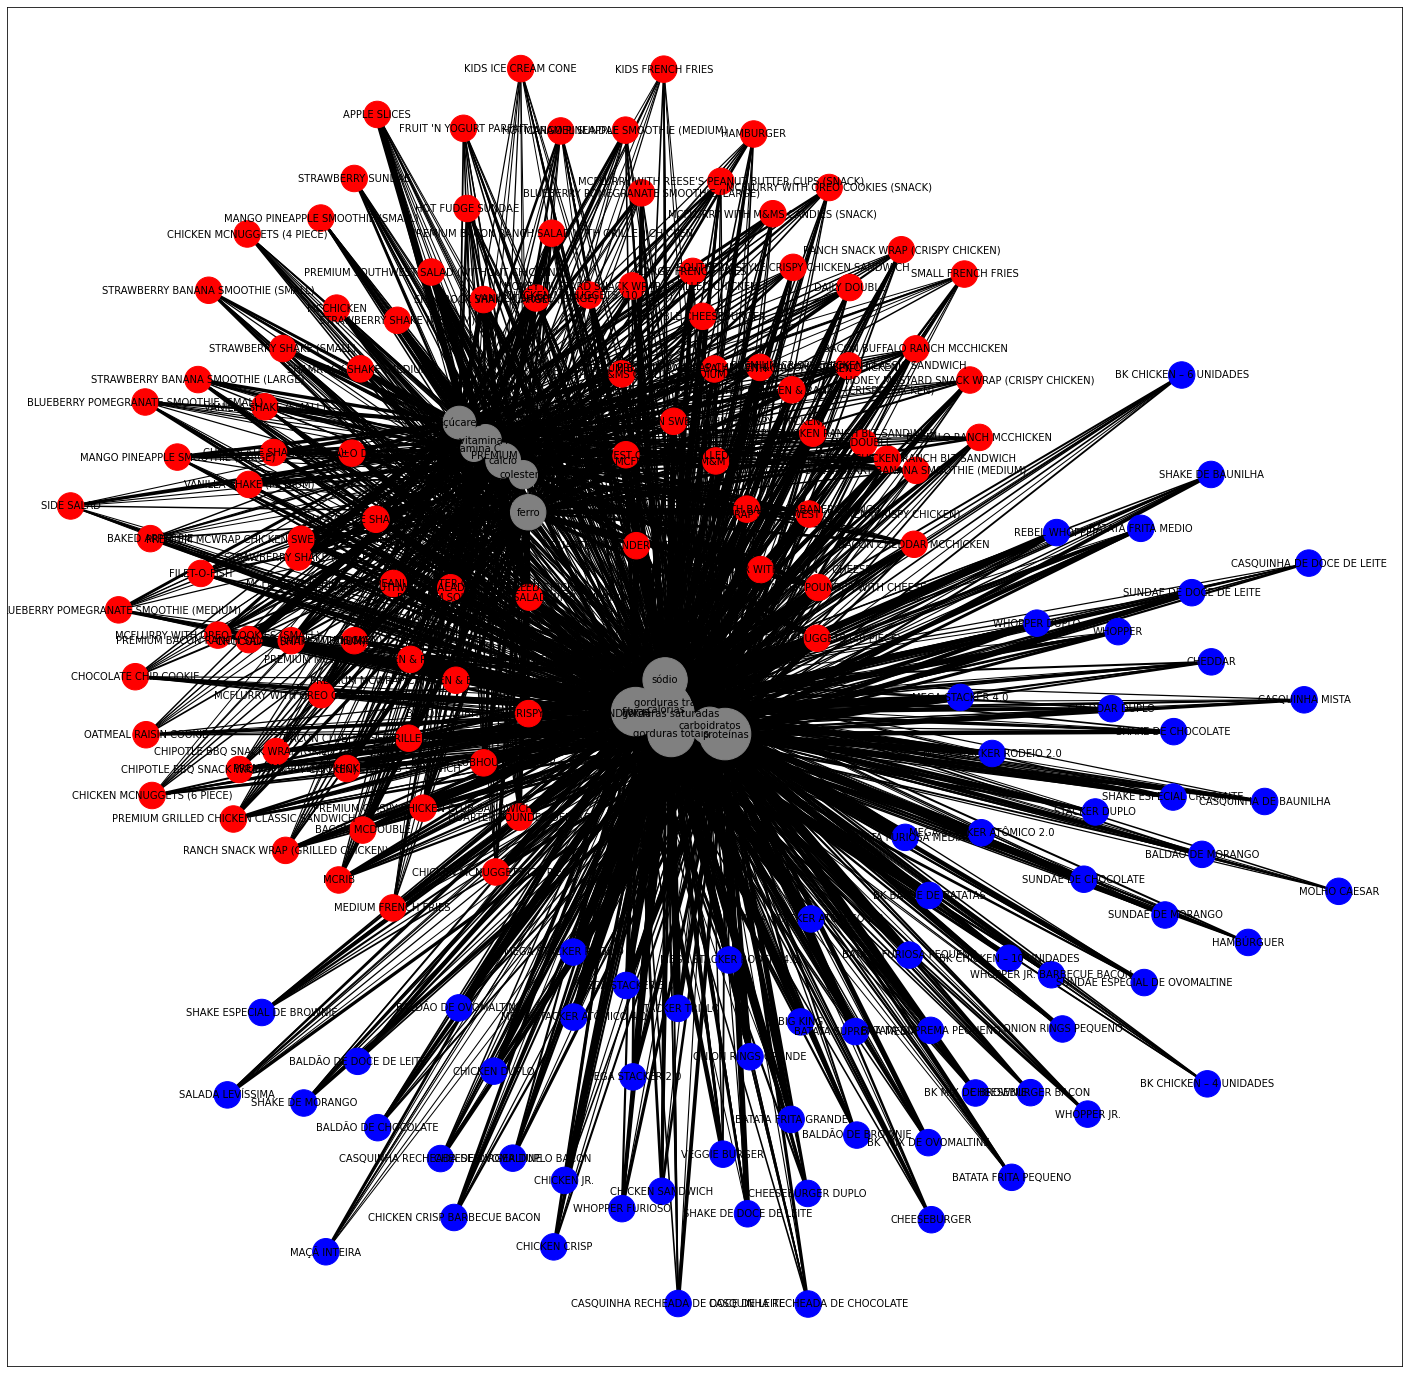

In [5]:
#plotar o grafo        
fig, ax = plt.subplots(figsize=(25,25))

pos = nx.spring_layout(fastfood)

for node in fastfood.nodes:
    fastfood.nodes[node]['pos'] = list(pos[node])

nx.draw_networkx(fastfood,  
                  arrows=True,
                  pos=pos,
                  with_labels=True,
                  ax=ax,
                  node_size=[nx.get_node_attributes(fastfood,'size')[g] for g in fastfood.nodes()], 
                  node_shape='o',
                  node_color=[nx.get_node_attributes(fastfood,'color')[g] for g in fastfood.nodes()],
                  alpha=1.0,
                  width=list(nx.get_edge_attributes(fastfood,'weight').values()),
                  style='solid',
                  font_size=10,
                  font_color='black',
                  font_weight='normal',
                  font_family='sans-serif')

In [66]:
#import json
#grafo = nx.cytoscape_data(fastfood)

#with open('grafo.txt', 'w') as outfile:
    #json.dump(grafo, outfile)    
    

In [7]:
#import json
#nodes = nx.cytoscape_data(fastfood)['elements']['nodes']
#edges = nx.cytoscape_data(fastfood)['elements']['edges']

#with open('nodes.txt', 'w') as outfile:
   # json.dump(nodes, outfile)
#with open('edges.txt', 'w') as outfile:
   # json.dump(edges, outfile)    

## Interativo (mas não pega os atributos)

In [8]:
#from ipycytoscape import CytoscapeWidget
#cyto = CytoscapeWidget()
#cyto.graph.add_graph_from_networkx(fastfood)

In [9]:
#display(cyto)

# Plotly 

### Seria mais interssante se o nome aparecesse só no hoverinfo, mas ainda nao consegui fazer 

In [ ]:
#https://plotly.com/python/network-graphs/

#https://plotly.com/python/hover-text-and-formatting/



In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go